# Gerekli Paketleri İndirme     1


In [1]:
import warnings #Belirlenen uyarıların engellenmesi için gerekli olan modülü import etme.
warnings.simplefilter(action="ignore", category=FutureWarning)  #action="ignore" bu uyarıları görüntülemez ve bastırır.
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
!pip install plotly
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install nbformat --upgrade

  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.5 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 5.10.4 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


# Kütüphaneleri import etme.        2

In [3]:
import numpy as np                                                                                               # NumPy, sayısal işlemler için kullanılır.
import pandas as pd                                                                                              # Pandas, veri analizi ve işlemleri için kullanılır. 
import io                                                                                                        # IO, (Input/Output) işlemleri için kullanılır.
import os                                                                                                        # os, İşletim sistemi işlemleri için kullanılır.

from PIL import Image                                                                                            # PIL, Python Image Library, görüntü işlemleri için kullanılır.
from glob import glob                                                                                            # Dosya yollarını almak için kullanılır.
import itertools                                                                                                 # İterasyon işlemleri için kullanılır.
import plotly.graph_objects as go                                                                                # Interaktif grafikler oluşturmak için kullanılır.
from plotly.subplots import make_subplots                                                                        # Alt grafikler oluşturmak için kullanılır.
import plotly.express as px                                                                                      # Hızlı görselleştirmeler oluşturmak için kullanılır.
import matplotlib.pyplot as plt                                                                                  # Grafikler oluşturmak için kullanılır.   

import seaborn as sns                                                                                            # Veri görselleştirmek için kullanılır.
import tensorflow as tf                                                                                          # Tensorflow, makine öğrenimi ve derin öğrenme kütüphanesidir.
from tensorflow.keras.preprocessing.image import ImageDataGenerator                                              # Görüntü verilerini işlemek için kullanılır.
from tensorflow.keras.models import Sequential                                                                   # Ardışık (Sequential) model oluşturmak için kullanılır.
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D               # Sinir ağı katmanları için kullanılır.
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping                                          # Eğitim sırasında çağrılacak işlevler için kullanılır.

from sklearn.model_selection import train_test_split                                                             # Veri setini eğitim ve test olarak ayırmak için kullanılır.
from sklearn.metrics import classification_report, confusion_matrix                                              # Sınıflandırma raporu ve karışıklık matrisi oluşturmak için kullanılır.

from IPython.display import display                                                                              # IPython içinde görüntü göstermek için kullanılır.

from IPython.core.interactiveshell import InteractiveShell                                                       # IPython için etkileşimli kabuk ayarlarını düzenlemek için kullanılır.

InteractiveShell.ast_node_interactivity = "all"

# Eğitim ve test veri setlerini hazırlama   3



In [4]:
def prepare_for_train_test(X, Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # %20'si test seti olarak kullanılacak.
    
    train_datagen = ImageDataGenerator(                        # ImageDataGenerator sınıfı kullanılarak veri arttırımı uygulamak için bir train_datagen nesnesi oluşturur.
                                  rescale = 1./255,            # Yeniden ölçeklendir.
                                  rotation_range = 10,         # Dönme açısı belirler.
                                  width_shift_range = 0.2,     # Görüntüyü yatayda kaydırır.
                                  height_shift_range = 0.2,    # Görüntüyü dikeyde kaydırır.
                                  shear_range = 0.2,           # Görüntüyü kesme etkisi uygulama aralığını belirler.
                                  horizontal_flip = True,      # Görüntüleri yatayda rastgele çevirir.
                                  vertical_flip = True,        # Görüntüleri dikeyde rastgele çevirir.
                                  fill_mode = 'nearest')       # Yeniden boyutlandırma ve döndürme işlemlerinde boş pixelleri en yakınındaki pixel ile doldurur.
    train_datagen.fit(X_train)                                 # train_datagen nesnesini, eğitim veri setine dönüşümler uygulanabilir şekilde uyumlu hale getirir.
    
    test_datagen = ImageDataGenerator(                         # Test veri seti için ImageDataGenerator nesnesi oluşturur.
                                  rescale = 1./255)            # Sadece yeniden ölçeklendirme yapılır çünkü test veri seti doğrulama amaçlı olduğu için orjinal haliyle kullanılır.
    
    test_datagen.fit(X_test)                                   # train_datagen nesnesini test veri setine uyumlu hale getirir.
    
    return X_train, X_test, Y_train, Y_test                    # test ve eğitim setlerini döndürür.

# Model Hazırlama                                       4
# Convolutional Neural Network - (CNN) oluşturma.

In [5]:
def create_model():
    model = Sequential()  # Yeni bir keras modeli oluşturma.

    # model.add(Conv2D(Kaç adet filtre kullanılacak, Her bir filtre için A X A 'lık bir pencere, (A X B X C) ilk ikisi girdi verisinin boyutu C ise kaç kanallı 
    # olacağı örneğin 3 ise (RGB), Activation fonksiyonunu belirtir, Özellik haritası boyutuyla giriş boyutu arasındaki ilişki))



    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))  # Evrişim katmanı ekler. 3X3'lük 16 filtre kullanılır.
    model.add(MaxPool2D(pool_size = (2,2)))                                                                       # Max pooling katmanını ekler. Özellik haritasını küçültür.

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))                             # Evrişim katmanı ekler. 3X3'lük 32 filtre kullanılır.
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))                                                     # Max pooling katmanını ekler. Özellik haritasını küçültür.

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))                             # Evrişim katmanı ekler. 3X3'lük 64 filtre kullanılır.
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))                                                     # Max pooling katmanını ekler. Özellik haritasını küçültür.
    
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))                            # Evrişim katmanı ekler. 3X3'lük 128 filtre kullanılır.
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))                                                     # Max pooling katmanını ekler. Özellik haritasını küçültür.

    model.add(Flatten())                                    # Evrişim ve havuzlama katmanlarından gelen özellik haritasını tek boyutlu bir vektöre dönüştürür.
    model.add(Dense(64, activation = 'relu'))               # İlk tam bağlantılı katmanı ekler ve 64 nöron içerir. ReLu activasyon fonksiyonunu kullanır.
    model.add(Dense(32, activation='relu'))                 # İkinci tam bağlantılı katmanı ekler ve 32 nöron içerir. ReLu activasyon fonksiyonunu kullanır.
    model.add(Dense(7, activation='softmax'))               # Çıkış katmanıdır ve 7 nöron içerir. Çünkü model "7" sınıflı bir sınıflandırma problemi için tasarlanıyor.

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',     # Kayıp fonksiyonunu belirtir.
                 optimizer = optimizer,
                  metrics = ['accuracy'])                       # Modelin performansını değerlendirmek için hangi metrikler kullanılacak.
    print(model.summary())                                      # özeti yazdır.
    return model;                                               # modeli döndür.


# Eğitim Planını Hazırlama      5


In [6]:
def train_model(model, X_train, Y_train, EPOCHS=25):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1,               # Overfitting olmasını engeller ve eğitimi durdurur. Herhangi bir iyileşme olmazsa kaç      
                           mode='auto')                                                  # epoch sabredeceğini patience ile belirtilir. mode='auto' olması durumunda durma kriteri 
                                                                                         # val_loss'un azalmasıdır.
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3,            # Öğrenme oranını dinamik olarak ayarlar. Öğrenme oranı belirli bir patience boyunca 
                              verbose=1, mode='auto')                                    # iyileşmezse öğrenme oranını factor kadar azaltır.       
                            
    history = model.fit(X_train,                                                         # E
                        Y_train,                                                         # Ğ
                        validation_split=0.2,                                            # İ
                        batch_size = 64,                                                 # T
                        epochs = EPOCHS,                                                 # İ
                        callbacks = [reduce_lr, early_stop])                             # M
    return history

# test the model    6

In [7]:
def test_model(model, X_test, Y_test):
    model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]                            # Test veri setinde modelin performansını değerlendirir.
    print("Test Accuracy: {:.3f}%".format(model_acc * 100))                             # Modelin test veri seti üzerinde elde ettiği doğruluk değerini ekrana yazdırır.
    y_true = np.array(Y_test)                                                           # Test veri setinin gerçek verilerini bir numpy arrayine çevirir.
    y_pred = model.predict(X_test)                                                      # X_test üzerinde tahminlerde bulunur ve olasılık dağılımlarını içeren dizi yapar.
    y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))                        # Her bir tahmin olasılık dağılımının en yüksek olasılığa sahip sınıfını seçer.
   
    clr = classification_report(y_true, y_pred, target_names=label_mapping.values())    # classification_report oluşturulur. Bu rapor her bir sınıf için precision, recall, 
                                                                                        # f1-score ve support metriklerini içeren detaylı bir sınıflandırma performansı içerir.
    print(clr)                                                                          # Bu rapor yazdırılır                                                                          
    
    sample_data = X_test[:15]                                                           # Test veri setinin ilk 15 örneği alınır.
    plt.figure(figsize=(22, 12))                                                        #bir matplotlib figürü oluşturur ve boyutlarını belirler.
    
    
    for i in range(15):
        plt.subplot(3, 5, i + 1)                                                        # Bu, 3x5'lik bir düzen oluşturarak 15 örneği gösterir.
        plt.imshow(sample_data[i])                                                      # Verilen örnekleri görüntüler.
        plt.title(label_mapping[y_true[i][0]] + '|' + label_mapping[y_pred[i]])         # Başlıklar oluşturulur.
        plt.axis("off")                                                                 # eksenleri kapatır.
    
    plt.show()                                                                          # Oluşturulan alt çizimleri gösterir.

# Veri Setini Okuma 7


In [8]:
base_skin_dir = "C:/Users/Bilgehan/Downloads/archive (1)"                                         # Veri setimin bulunduğu konum


imageid_path_dict = {                                                                                        
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, "HAM10000_images_part_1", '*.jpg'))                 # Belirli bir dizindeki dosya isimlerini listelemek için kullanılır.       
}

lesion_type_dict = {                                                                              # Açıklayıcı metinlere eşleyen bir sözlük oluşturur
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}
label_mapping = {
    0: 'nv',                                                                                        # Sayısal değerlerle metinsel etiketler arasında bir eşleşme sağlar
    1: 'mel',                                                                                       # Örneğin 0 sayısı nv ile eşleşir
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
reverse_label_mapping = {value: key for key, value in label_mapping.items()}                        # Buda sözlüğü tersine çevirir ve nv sözcüğü 0 a karşılık gelir
    

In [9]:
data = pd.read_csv(os.path.join(base_skin_dir,"C:/Users/Bilgehan/Downloads/archive (1)/HAM10000_metadata.csv"))     # Pandas kütüphanesini kullanarak veriyi okur.

data['path'] = data['image_id'].map(imageid_path_dict.get)         # 'image_id' sütunundaki değerleri, tam dosya yolunu içeren yeni bir 'path' sütunu oluşturur.           
data['cell_type'] = data['dx'].map(lesion_type_dict.get)           # 'dx' sütunundaki değerleri lezyon türlerinin adını içeren yeni bir 'cell_type' sütunu oluşturur.             
data['cell_type_idx'] = pd.Categorical(data['cell_type']).codes    # cell_type sütununu kategorik şekilde kodlar,her biri için index oluşturup cell_type_idx sütununa ekler.             

data.head(6) # İlk altı veriyi gösterir.


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2


In [10]:
data.describe(exclude=[np.number])   # istatistiksel özetler.

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0003789,ISIC_0027419,nv,histo,male,back,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Melanocytic nevi (nv)
freq,6,1,6705,5340,5406,2192,1,6705


In [11]:
print ("Data setinde toplam eksik değer sayisi = ",data.isnull().any().sum())  # Veri setinde kaç tane eksik değer olduğunu döndürür.

Data setinde toplam eksik değer sayisi =  1


# Imputing the Null values and preparing the data   8

In [12]:

data['age'].fillna(value=int(data['age'].mean()), inplace=True)  # yaş sütunundaki boş değerleri yaş ortalaması ile doldurur.

data['age'] = data['age'].astype('int32')                        # veri tipini integer yapar.

In [13]:
data.head()     # ilk 5 değeri döndürür.


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2


In [14]:
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))      
# path sütunundaki yolları alır ve ilgili fotoğrafı yeniden boyutlandırır.
# daha sonra bu görüntünün pixel değerlerini image_pixel adındaki sütuna ekler.

data.head(5)        # ilk 5 değeri dönüdür.


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image_pixel
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,C:/Users/Bilgehan/Downloads/archive (1)\HAM100...,Benign keratosis-like lesions (bkl),2,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [15]:
data['label'] = data['dx'].map(reverse_label_mapping.get)  # 'reverse_label_mapping' sözlüğünü kullanarak sayısaldan metinsel etiketlere dönüştürür ve label sütununa atar

data = data.sort_values('label')    #  'label' sütunundaki değerlere göre verileri alfabetik olarak sıralar.
data = data.reset_index()           #  indeksler ardışık sayılardan oluşacak şekilde yeniden düzenler.

In [16]:
counter = 0                             # sayaç oluşturma.
frames = [data]                         # İlk olarak, frames adlı bir liste oluşturulur ve bu listenin ilk öğesi olarak mevcut 'data' veri çerçevesi eklenir.
for i in [4,4,11,17,45,52]:             # Bu döngü lezyon satır sayılarını arttırma işlemi yapar. ilk lezyon sayısını 4 katına çıkarır.                        
    counter+=1                                                       # sayacı bir arttır.
    index = data[data['label'] == counter].index.values              #'label' sütunundaki sayaç değerine karşılık gelen indeksleri alır.
    df_index = data.iloc[int(min(index)):int(max(index)+1)]          #Belirtilen indeksler aralığındaki satırları içeren bir alt veri çerçevesi oluşturur.
    df_index = pd.concat([df_index] * i, ignore_index=True)  #pd.concat(), belirtilen veri çerçevesini (df_index) belirtilen sayıda kopyalar ve ardışık bir şekilde birleştirir.
    frames.append(df_index)                                  # çoğaltılmış halini ekler.
    

In [17]:
len(frames)


7

In [18]:
final_data = pd.concat(frames)  # frames listesini final_data adlı veri setine ekleme işlemi

In [19]:
print(data.shape)               # shape fonksiyonu data setinin satır ve sütunlarını döndürür.
print(final_data.shape) 

(10015, 13)
(42446, 13)


In [20]:

X_orig = data['image_pixel'].to_numpy()         # X_orig image_pixel sütunundan piksel değerlerini alarak numpy dizileri oluşturur.
X_orig = np.stack(X_orig, axis=0)               # Oluşturulan bu dizileri birleştirilir.
Y_orig = np.array(data.iloc[:, -1:])            # son sütundaki etiket verilerini alır ver numpy dizisine dönüştürür.


print(X_orig.shape)                             # X_orig ve Y_orig dizilerinin boyutları yazdırılır.           
print(Y_orig.shape)

(10015, 28, 28, 3)
(10015, 1)


In [21]:
# AUGMENTED DATA

X_aug = final_data['image_pixel'].to_numpy()        # X_aug image_pixel sütunundan pixel verilerini alarak numpy dizileri oluşturur.
X_aug = np.stack(X_aug, axis=0)                     # Oluşturulan bu dizileri birleştirilir.
Y_aug = np.array(final_data.iloc[:, -1:])           # son sütundaki etiket verilerini alır ver numpy dizisine dönüştürür.


print(X_aug.shape)                                  # X_aug ve Y_aug dizilerinin boyutları yazdırılır.          
print(Y_aug.shape)

(42446, 28, 28, 3)
(42446, 1)


In [22]:

X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = prepare_for_train_test(X_orig, Y_orig)

In [23]:
model =create_model()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)         

In [24]:
X_train_aug, X_test_aug, Y_train_aug, Y_test_aug = prepare_for_train_test(X_aug, Y_aug)

In [25]:
model2_history = train_model(model, X_train_aug, Y_train_aug, 50)

Epoch 1/50


425/425 [==============================] - 7s 14ms/step - loss: 1.7594 - accuracy: 0.4441 - val_loss: 1.1452 - val_accuracy: 0.5785 - lr: 0.0010
Epoch 2/50
425/425 [==============================] - 5s 13ms/step - loss: 0.9392 - accuracy: 0.6455 - val_loss: 0.7564 - val_accuracy: 0.7316 - lr: 0.0010
Epoch 3/50
425/425 [==============================] - 5s 13ms/step - loss: 0.6725 - accuracy: 0.7461 - val_loss: 0.6517 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 4/50
425/425 [==============================] - 5s 12ms/step - loss: 0.5173 - accuracy: 0.8037 - val_loss: 0.4507 - val_accuracy: 0.8326 - lr: 0.0010
Epoch 5/50
425/425 [==============================] - 5s 13ms/step - loss: 0.3864 - accuracy: 0.8564 - val_loss: 0.3847 - val_accuracy: 0.8557 - lr: 0.0010
Epoch 6/50
425/425 [==============================] - 5s 13ms/step - loss: 0.3285 - accuracy: 0.8782 - val_loss: 0.3055 - val_accuracy: 0.8874 - lr: 0.0010
Epoch 7/50
425/425 [==============================] - 5s 13ms/

In [26]:
def plot_model_training_curve(history):                                                                # Bu fonksiyon görsel inceleme için kullanılır.                 
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], 
            name='train_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], 
            name='val_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], 
            name='train_loss'), 
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], 
            name='val_loss'), 
        row=1, col=2)
    fig.show()

    
plot_model_training_curve(model2_history)

Test Accuracy: 97.204%
63/63 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

          nv       1.00      0.96      0.98      1329
         mel       0.88      1.00      0.93       236
         bkl       0.93      1.00      0.96       226
         bcc       0.98      1.00      0.99       102
       akiec       0.98      1.00      0.99        53
        vasc       0.87      1.00      0.93        26
          df       1.00      1.00      1.00        31

    accuracy                           0.97      2003
   macro avg       0.95      0.99      0.97      2003
weighted avg       0.97      0.97      0.97      2003



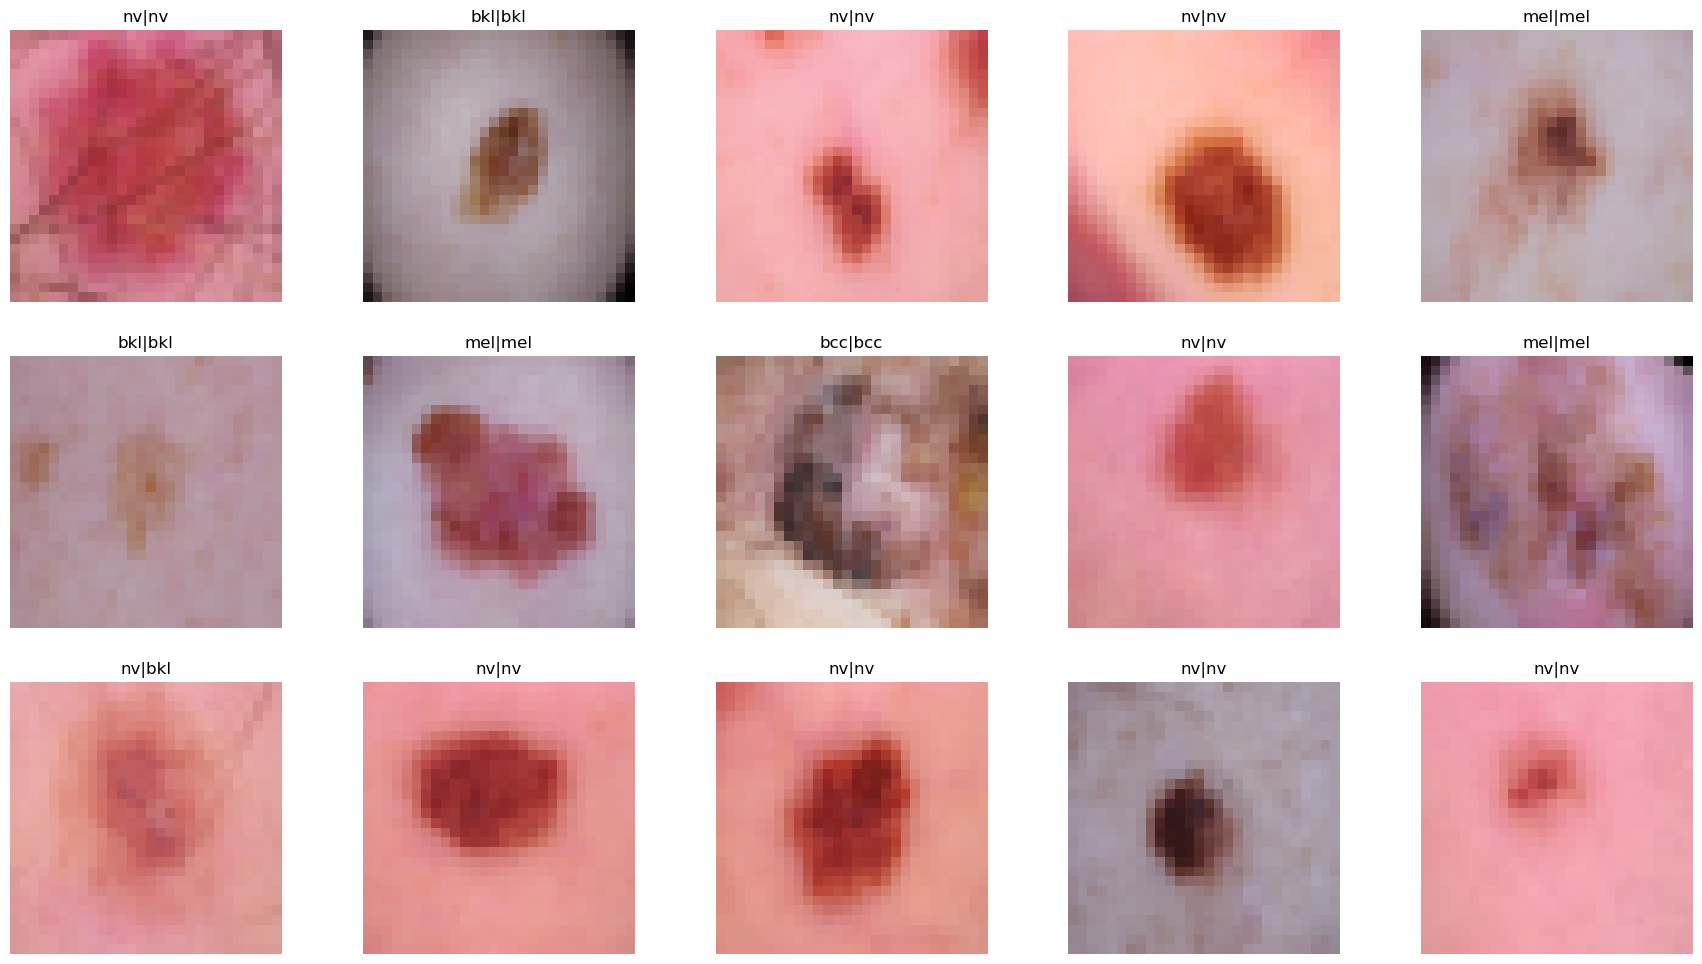

In [27]:
test_model(model, X_test_orig, Y_test_orig)

Test Accuracy: 97.703%
266/266 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

          nv       0.99      0.87      0.93      1391
         mel       0.93      0.99      0.96      1121
         bkl       0.94      0.99      0.97      1074
         bcc       0.99      1.00      0.99      1248
       akiec       0.99      1.00      1.00      1171
        vasc       1.00      1.00      1.00      1281
          df       1.00      1.00      1.00      1204

    accuracy                           0.98      8490
   macro avg       0.98      0.98      0.98      8490
weighted avg       0.98      0.98      0.98      8490



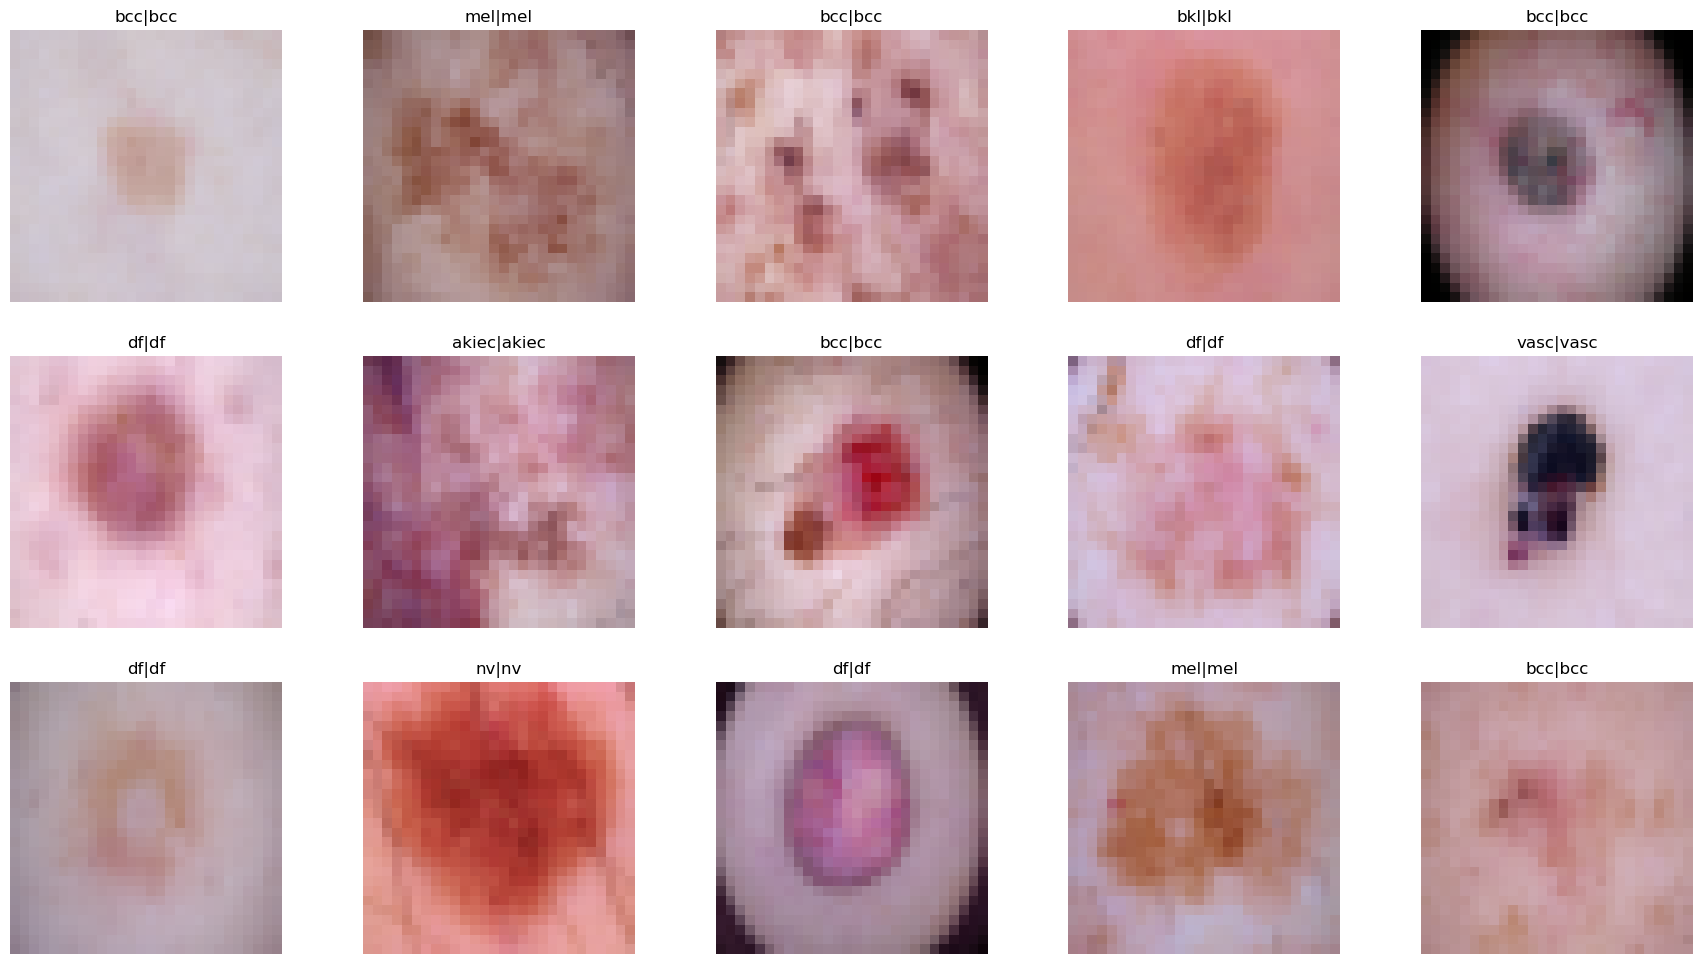

In [28]:
test_model(model, X_test_aug, Y_test_aug)